In [5]:
!pip install comet_ml

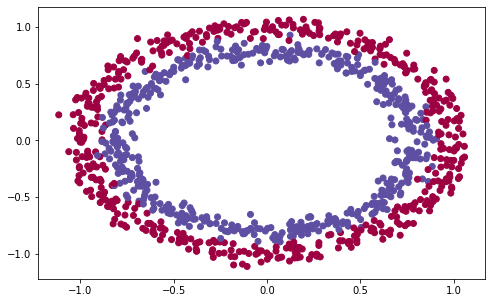

In [6]:
import random
import datetime
import comet_ml
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# create the data 
X, y = make_circles(
    n_samples=1000, noise=0.05, random_state=42
)

# creating train and test
X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=42
)

plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, 
                                                   activation="relu", 
                                                   input_shape=(X.shape[1], )),
                             tf.keras.layers.Dense(10, 
                                                   activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
# initialize artifacts
train_data_artifact = comet_ml.Artifact(name="training_data",
                                        artifact_type="dataset",
                                        metadata={"current_data": datetime.datetime.utcnow().isoformat()})
train_labels_artifact = comet_ml.Artifact(name="training_labels",
                                        artifact_type="dataset",
                                        metadata={"current_data": datetime.datetime.utcnow().isoformat()})

validation_data_artifact = comet_ml.Artifact(name="validation_data",
                                             artifact_type="dataset", 
                                             metadata={"current_date": datetime.datetime.utcnow().isoformat()})

validation_labels_artifact = comet_ml.Artifact(name="validation_labels",
                                             artifact_type="dataset", 
                                             metadata={"current_date": datetime.datetime.utcnow().isoformat()})

for i in range(5):
  experiment = comet_ml.Experiment(
    api_key="KGsg6IUGc5FpgH2lp3uF2gMbv", 
    project_name="testing-comet-experiments",
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    auto_histogram_epoch_rate=True
    )
  
  model_artifact = comet_ml.Artifact(name=f"model_{i}", 
                                     artifact_type="model",
                                     metadata={"current_date": datetime.datetime.utcnow().isoformat()})

  # model training
  with experiment.train():
    seed = np.random.randint(low=0, high=1000, dtype=int)

    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

    experiment.log_parameter("random_seed", seed)

    model.fit(X_train, y_train, epochs=50, verbose=0)
    model.save(f"my_model_{i}.h5")

    # adding the artifact 
    model_artifact.add(f"my_model_{i}.h5")
    experiment.log_artifact(model_artifact)

    if i==0: 
      np.savetxt("training_data.txt", X_train)
      np.savetxt("training_labels.txt", y_train)
      np.savetxt("validation_data.txt", X_val)
      np.savetxt("validation_labels.txt", y_val)

      # adding data
      train_data_artifact.add("training_data.txt")
      train_labels_artifact.add("training_labels.txt")
      validation_data_artifact.add("validation_data.txt")
      validation_labels_artifact.add("validation_labels.txt")

      # logging each artifact
      experiment.log_artifact(train_data_artifact)
      experiment.log_artifact(train_labels_artifact)
      experiment.log_artifact(validation_data_artifact)
      experiment.log_artifact(validation_labels_artifact)
  
  # model validation
  with experiment.validate(): 
    loss, acc = model.evaluate(X_val, y_val)
    
    experiment.log_metric("loss", loss)
    experiment.log_metric("accuracy", acc)

    experiment.end()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kurtispykes/testing-comet-experiments/1dcdc59a284b40c582ad2709c4d6950d

COMET INFO: Artifact 'model_0' version 3.0.0 created (previous was: 2.0.0)
COMET INFO: Scheduling the upload of 1 assets for a size of 32.60 KB, this can take some time
COMET INFO: Artifact 'kurtispykes/model_0:3.0.0' has started uploading asynchronously
COMET INFO: Artifact 'training_data' version 2.0.0 created (previous was: 1.0.0)
COMET INFO: Scheduling the upload of 1 assets for a size of 37.36 KB, this can take some time
COMET INFO: Artifact 'kurtispykes/training_data:2.0.0' has started u

8/8 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.9240


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kurtispykes/testing-comet-experiments/1dcdc59a284b40c582ad2709c4d6950d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_accuracy [50]        : (0.4959999918937683, 0.9786666631698608)
COMET INFO:     train_batch_accuracy [150] : (0.28125, 1.0)
COMET INFO:     train_batch_loss [150]     : (0.334680438041687, 0.7086842060089111)
COMET INFO:     train_epoch_duration [50]  : (0.034932130000015604, 1.287171226999817)
COMET INFO:     train_loss [50]            : (0.3459616005420685, 0.6902713179588318)
COMET INFO:     validate_accuracy          : 0.9240000247955322
COMET INFO:     validate_loss              : 0.3935783803462982
COMET INFO:   Others:
COMET INFO:     notebook_url           : https://colab.research.google.com/notebook#fileId

8/8 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 0.9280


COMET INFO: Artifact 'kurtispykes/model_1:2.0.0' has been fully uploaded successfully
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kurtispykes/testing-comet-experiments/9b2822c27d454b0183048ca8135afb69
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_accuracy [50]        : (0.9733333587646484, 0.9893333315849304)
COMET INFO:     train_batch_accuracy [150] : (0.90625, 1.0)
COMET INFO:     train_batch_loss [150]     : (0.07558223605155945, 0.3517409563064575)
COMET INFO:     train_epoch_duration [50]  : (0.03592272599962598, 0.3900685890002933)
COMET INFO:     train_loss [50]            : (0.11137454956769943, 0.33336731791496277)
COMET INFO:     validate_accuracy          : 0.9279999732971191
COMET INFO:     validate_loss              : 0.18167844414710999
COMET INFO:   Others:

8/8 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9280


COMET INFO: Artifact 'kurtispykes/model_2:2.0.0' has been fully uploaded successfully
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kurtispykes/testing-comet-experiments/dcdd3c755b3c4d8da7a49b6a9ac073c1
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_accuracy [50]        : (0.9773333072662354, 0.9866666793823242)
COMET INFO:     train_batch_accuracy [150] : (0.9375, 1.0)
COMET INFO:     train_batch_loss [150]     : (0.034738827496767044, 0.16206717491149902)
COMET INFO:     train_epoch_duration [50]  : (0.03793257699999231, 0.368664071999774)
COMET INFO:     train_loss [50]            : (0.07148415595293045, 0.1095028668642044)
COMET INFO:     validate_accuracy          : 0.9279999732971191
COMET INFO:     validate_loss              : 0.14841370284557343
COMET INFO:   Others:


8/8 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.9280


COMET INFO: Artifact 'kurtispykes/model_3:2.0.0' has been fully uploaded successfully
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kurtispykes/testing-comet-experiments/b93b2ffc49b949e8b3ae439ff2ae3f43
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_accuracy [50]        : (0.9773333072662354, 0.9893333315849304)
COMET INFO:     train_batch_accuracy [150] : (0.90625, 1.0)
COMET INFO:     train_batch_loss [150]     : (0.019807614386081696, 0.13824093341827393)
COMET INFO:     train_epoch_duration [50]  : (0.03507445800005371, 0.19815737499993702)
COMET INFO:     train_loss [50]            : (0.05766717344522476, 0.07018885016441345)
COMET INFO:     validate_accuracy          : 0.9279999732971191
COMET INFO:     validate_loss              : 0.1422213464975357
COMET INFO:   Other

8/8 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9320


COMET INFO: Artifact 'kurtispykes/model_4:2.0.0' has been fully uploaded successfully
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kurtispykes/testing-comet-experiments/5348b96f46cd4b5980b13ab94d24cbe6
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_accuracy [50]        : (0.9773333072662354, 0.9879999756813049)
COMET INFO:     train_batch_accuracy [150] : (0.90625, 1.0)
COMET INFO:     train_batch_loss [150]     : (0.00982031598687172, 0.1600896418094635)
COMET INFO:     train_epoch_duration [50]  : (0.03558236800017767, 0.2086519499998758)
COMET INFO:     train_loss [50]            : (0.05059663951396942, 0.05919628217816353)
COMET INFO:     validate_accuracy          : 0.9319999814033508
COMET INFO:     validate_loss              : 0.14163999259471893
COMET INFO:   Others:

In [14]:
experiment = comet_ml.Experiment(api_key="KGsg6IUGc5FpgH2lp3uF2gMbv")

artifact_model_3 = experiment.get_artifact(artifact_name="model_3",
                                           workspace="kurtispykes")

for asset in artifact_model_3.assets:
  print(f"Logical path: {asset.logical_path}\n\
  Size: {asset.size}\n\
  Metadata: {asset.metadata}\n\
  Type: {asset.asset_type}\n\
  Artifact ID: {asset.artifact_id}\n\
  ID: {asset.id}\n\
  Version: {asset.artifact_version_id}")


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kurtispykes/general/e1e76efd63e344778faa77d2df4f2ee8
COMET INFO:   Downloads:
COMET INFO:     artifacts : 1
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1PjVgzLe7rWBEgkU9W7cNb5qhj8vXMSq-
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repo

Logical path: my_model_3.h5
  Size: 33384
  Metadata: None
  Type: unknown
  Artifact ID: 0c433884-b586-47a5-bf21-c841c8dc9733
  ID: c27a83b616284beeafc91c69c1952df2
  Version: 5fbcb375-bf52-47f9-a9f1-9e87fed09a25


In [22]:
# generating new instances
X, y = make_circles(
    n_samples=200, noise=0.05, random_state=42
)

# retrieve old training data
experiment = comet_ml.Experiment(api_key="KGsg6IUGc5FpgH2lp3uF2gMbv")
train_data_artifact = experiment.get_artifact(artifact_name="training_data",
                                              workspace="kurtispykes")
train_labels_artifact = experiment.get_artifact(artifact_name="training_labels",
                                              workspace="kurtispykes")

# download non-remote assets to local disk 
local_train_data_artifact = train_data_artifact.download("new_data")
local_train_labels_artifact = train_labels_artifact.download("new_labels")

# loading the data from a txt file
train_data = np.genfromtxt("new_data/training_data.txt")
train_labels = np.genfromtxt("new_labels/training_labels.txt")

# joining the new data to old data
train_data_updated = np.concatenate((X_train, X), axis=0)
train_labels_updated = np.concatenate((y_train, y), axis=0)

# saving the updated data locally
np.savetxt("updated_training_data.txt", X_train)
np.savetxt("updated_training_labels.txt", y_train)

# logging the updated data artifacts
local_train_data_artifact.add("updated_training_data.txt")
local_train_labels_artifact.add("updated_training_labels.txt")

# bumping the version
local_train_data_artifact.version = train_data_artifact.version.next_minor()
local_train_labels_artifact.version = train_labels_artifact.version.next_minor()

# logging the artifacts
experiment.log_artifact(local_train_data_artifact)
experiment.log_artifact(local_train_labels_artifact)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kurtispykes/general/a9d14960cd134b4d967d9b1b7b93c30f
COMET INFO:   Downloads:
COMET INFO:     artifact assets : 2 (55.67 KB)
COMET INFO:     artifacts       : 2
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1PjVgzLe7rWBEgkU9W7cNb5qhj8vXMSq-
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged

LoggedArtifact(artifact_name='training_labels', artifact_type='dataset', workspace='kurtispykes', version=Version('2.1.0'), aliases=frozenset(), artifact_tags=frozenset(), version_tags=frozenset(), size=0, source_experiment_key='013f108aec3d46f6b52fd4e5e3383f2d')